# Patient Data Extraction


### Extracting the CHB-MIT Scalp EEG Database & Analyzing data of 2 patients

Installing all the requirements:

In [ ]:
! pip install pyedflib mne matplotlib numpy pandas


***Goal Of this Notebook***
* Convert the edf files into visual representations to understand them better.
* Extracting the seizure segments from edf data and converting it to csv for Dashboard (PowerBI) purposes.
* Analyzing the seizure segments to understand the patterns and trends.

### Reading the EDF File

Extracting EDF parameters from c:\Users\prani\OneDrive\Desktop\IEEE EMBS Internship\notebooks\data\chb01_03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\prani\AppData\Local\Temp\ipykernel_15936\1016257616.py:4: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf('data/chb01_03.edf', preload=True)


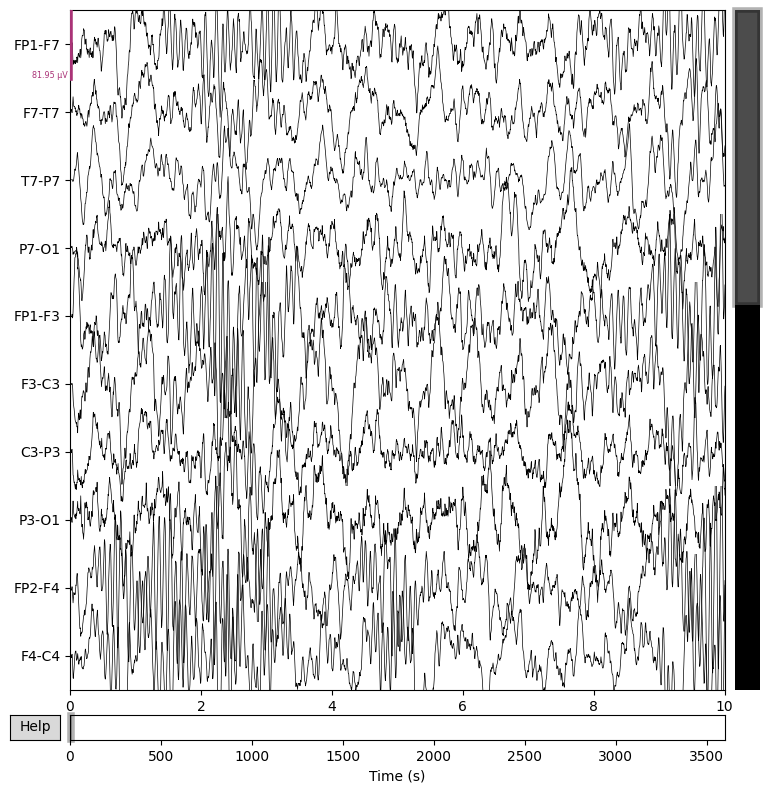

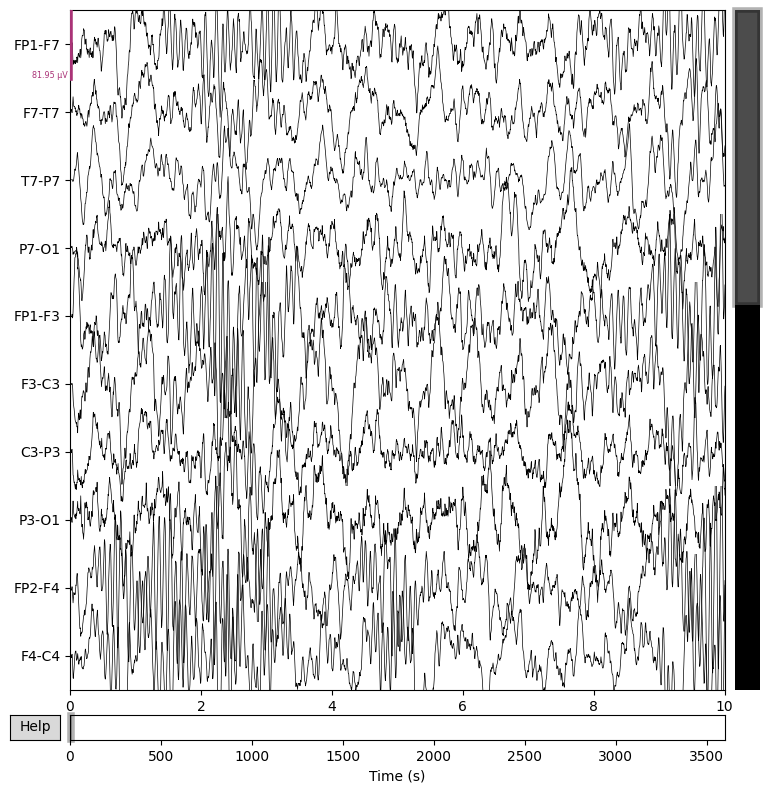

In [12]:
import mne

# Load the EDF file
raw = mne.io.read_raw_edf('data/chb01_03.edf', preload=True)

# Check basic info
raw.info

# Plot EEG signals
raw.plot(n_channels=10, scalings='auto', title='EEG Raw Data', show=True)


### Visualizing Time Specific Window

Extracting EDF parameters from c:\Users\prani\OneDrive\Desktop\IEEE EMBS Internship\notebooks\data\chb01_03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\prani\AppData\Local\Temp\ipykernel_14576\794535307.py:4: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf("data/chb01_03.edf", preload=True)


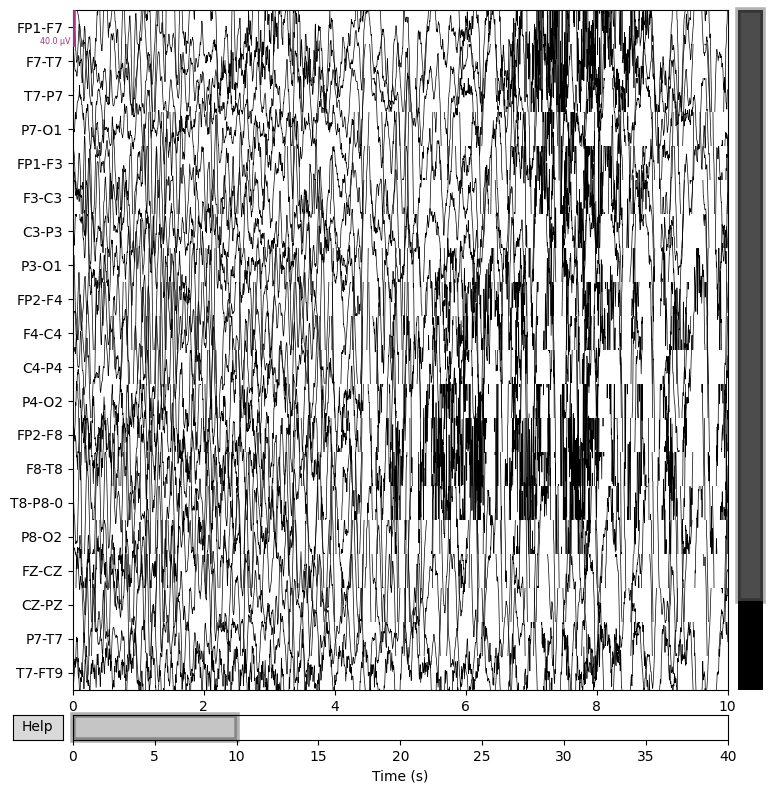

In [7]:
import mne

# Load the EEG data
raw = mne.io.read_raw_edf("data/chb01_03.edf", preload=True)

# Seizure occurs from 2996s to 3036s in the recording
seizure_start = 2996
seizure_end = 3036

# Crop EEG to seizure segment
seizure_segment = raw.copy().crop(tmin=seizure_start, tmax=seizure_end)

# Plot seizure segment
seizure_segment.plot(title='Seizure EEG Segment', show=False)


**We can clearly see that these graphs cannot be used directly for deriving insights and understanding the data better. Hence, we are going to pre-process it further and extract seizure segments from the edf file**

### Saving it as a CSV File

In [ ]:
import pandas as pd

# Convert EEG data to NumPy array
data, times = seizure_segment[:]

# Convert to DataFrame
df = pd.DataFrame(data.T, columns=raw.ch_names)

# Save to CSV
df.to_csv('seizure_segment_chb01_03.csv', index=False)


## Preprocessing the Data

In [19]:
# Display basic statistics and info about the DataFrame
print("DataFrame shape:", df.shape)
df.describe()
df.info()

DataFrame shape: (10241, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10241 entries, 0 to 10240
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   FP1-F7    10241 non-null  float64
 1   F7-T7     10241 non-null  float64
 2   T7-P7     10241 non-null  float64
 3   P7-O1     10241 non-null  float64
 4   FP1-F3    10241 non-null  float64
 5   F3-C3     10241 non-null  float64
 6   C3-P3     10241 non-null  float64
 7   P3-O1     10241 non-null  float64
 8   FP2-F4    10241 non-null  float64
 9   F4-C4     10241 non-null  float64
 10  C4-P4     10241 non-null  float64
 11  P4-O2     10241 non-null  float64
 12  FP2-F8    10241 non-null  float64
 13  F8-T8     10241 non-null  float64
 14  T8-P8-0   10241 non-null  float64
 15  P8-O2     10241 non-null  float64
 16  FZ-CZ     10241 non-null  float64
 17  CZ-PZ     10241 non-null  float64
 18  P7-T7     10241 non-null  float64
 19  T7-FT9    10241 non-null  float64
 20 

In [22]:
# Let's check for null values
print("Null values in DataFrame: \n")
print(df.isnull().sum())
print("Percentage of null values in dataframe: \n")
print(df.isnull().mean() * 100)

Null values in DataFrame: 

FP1-F7      0
F7-T7       0
T7-P7       0
P7-O1       0
FP1-F3      0
F3-C3       0
C3-P3       0
P3-O1       0
FP2-F4      0
F4-C4       0
C4-P4       0
P4-O2       0
FP2-F8      0
F8-T8       0
T8-P8-0     0
P8-O2       0
FZ-CZ       0
CZ-PZ       0
P7-T7       0
T7-FT9      0
FT9-FT10    0
FT10-T8     0
T8-P8-1     0
dtype: int64
Percentage of null values in dataframe: 

FP1-F7      0.0
F7-T7       0.0
T7-P7       0.0
P7-O1       0.0
FP1-F3      0.0
F3-C3       0.0
C3-P3       0.0
P3-O1       0.0
FP2-F4      0.0
F4-C4       0.0
C4-P4       0.0
P4-O2       0.0
FP2-F8      0.0
F8-T8       0.0
T8-P8-0     0.0
P8-O2       0.0
FZ-CZ       0.0
CZ-PZ       0.0
P7-T7       0.0
T7-FT9      0.0
FT9-FT10    0.0
FT10-T8     0.0
T8-P8-1     0.0
dtype: float64


***That indicates that data is already clean and does not contain any missing values/ invalid Datatypes.***

Now that we have generated a CSV file where each column represents a specific EEG channel or electrode connection, here is the description of columns present:
| Channel Name | Meaning                                              |
| ------------ | ---------------------------------------------------- |
| **FP1-F7**   | Frontopolar left ↔ Frontal left                      |
| **F7-T7**    | Frontal left ↔ Temporal left                         |
| **T7-P7**    | Temporal left ↔ Parietal left                        |
| **P7-O1**    | Parietal left ↔ Occipital left                       |
| **FP1-F3**   | Frontopolar left ↔ Frontal mid-left                  |
| **F3-C3**    | Frontal mid-left ↔ Central mid-left                  |
| **C3-P3**    | Central mid-left ↔ Parietal mid-left                 |
| **P3-O1**    | Parietal mid-left ↔ Occipital left                   |
| **FP2-F4**   | Frontopolar right ↔ Frontal mid-right                |
| **F4-C4**    | Frontal mid-right ↔ Central mid-right                |
| **C4-P4**    | Central mid-right ↔ Parietal mid-right               |
| **P4-O2**    | Parietal mid-right ↔ Occipital right                 |
| **FP2-F8**   | Frontopolar right ↔ Frontal right                    |
| **F8-T8**    | Frontal right ↔ Temporal right                       |
| **T8-P8**    | Temporal right ↔ Parietal right                      |
| **P8-O2**    | Parietal right ↔ Occipital right                     |
| **FZ-CZ**    | Frontal midline ↔ Central midline                    |
| **CZ-PZ**    | Central midline ↔ Parietal midline                   |
| **T9-P7**    | Temporal far-left ↔ Parietal left                    |
| **P7-O1**    | Parietal left ↔ Occipital left                       |
| **T10-P8**   | Temporal far-right ↔ Parietal right                  |
| **P8-O2**    | Parietal right ↔ Occipital right                     |
| **FT9-FT10** | Far Temporal Left ↔ Far Temporal Right (cross-brain) |


**There are in total 23 channels, we will plot all channels in accordance with the part of brain they represent & analyze them .**

We are going to plot 4 graphs based on which regions of the brain these channels represent.
Brain Size Channels

| Brain Regions      | Channels                                           |
| -----------------  | ---------------------------------------------------|
| **Frontal**        | FP1-F7, FP2-F8, F3-C3, F4-C4                       |
| **Temporal**       | F7-T7, F8-T8, T7-P7, T8-P8-0                         |
| **Parietal**       | P3-O1, P4-O2, CZ-PZ, P7-O1                         |
| **Midline & Deep** | FZ-CZ, CZ-PZ, FT9-FT10                             |


### Brain Structure

![Brain Structure](brain_structure.png)

### The Frontal Lobe is responsible for:
* Executive functions (planning, decision-making, problem-solving)
* Motor control (movement, coordination)
* Any seizure detected in Frontal Lobe will directly impact these functions either for short term (1-2 seconds) or for longer durations.

### The Temporal Lobe is responsible for:
* Auditory processing (hearing, sound recognition)
* Memory (short-term and long-term)
* Any seizure detected in Temporal Lobe will impact the Memory or hearing/speech recognition.

### The Parietal lobe is responsible for:
* Sensory processing (touch, spatial awareness)
* Processing of sensory information
* Any seizure detected in Parietal lobe will impact the sensory processing.

### The Occipital lobe is responsible for:
* Visual processing (vision, visual perception)
* Any seizure detected in Occipital lobe will impact the vision.

**Frontal Region Visualization**

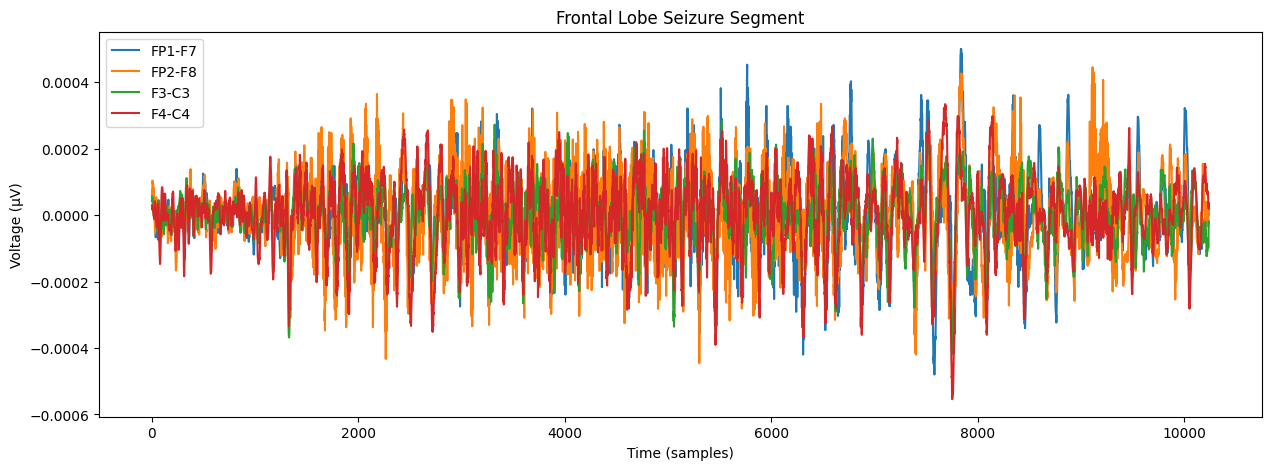

In [14]:
import matplotlib.pyplot as plt

df[['FP1-F7', 'FP2-F8', 'F3-C3', 'F4-C4']].plot(figsize=(15, 5), title='Frontal Lobe Seizure Segment')
plt.xlabel("Time (samples)")
plt.ylabel("Voltage (µV)")
plt.show()


**Based on the visualizations we can derive the following insights for Frontal Lobe**
* Noticeable spike in signal amplitude between samples ~6000–8000. This indicates intense neural firing in this region.
* FP2-F8 and F4-C4 channels show the strongest activity, hinting at disruption in executive and motor control functions.
* Hence,it likely correlates with brief motor or behavioral arrest, common in frontal lobe seizures, even without visible convulsions.


**Temporal Region Visualization**

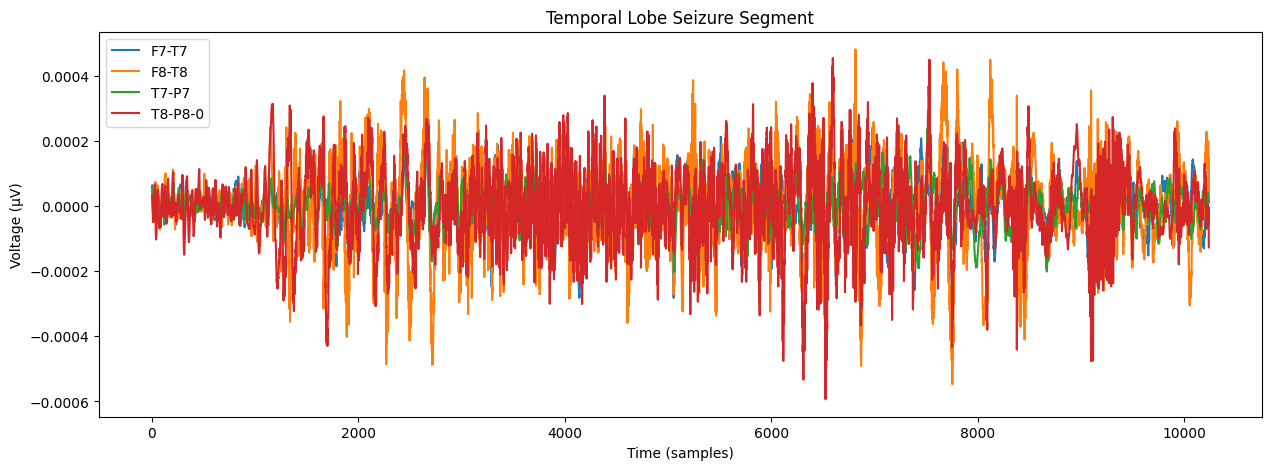

In [15]:
import matplotlib.pyplot as plt

df[['F7-T7', 'F8-T8', 'T7-P7', 'T8-P8-0']].plot(figsize=(15, 5), title='Temporal Lobe Seizure Segment')
plt.xlabel("Time (samples)")
plt.ylabel("Voltage (µV)")
plt.show()

**Based on the visualizations we can derive the following insights for Temporal Lobe**
* F8-T8 and T8-P8-0 channels exhibit large-amplitude fluctuations and rapid frequency bursts which are signature traits of epileptic activity.
* Temporal lobes are a frequent origin site for focal epilepsy, and this graph supports that clinical correlation.
* The chaotic signal patterns may reflect symptoms like impaired awareness, auditory hallucinations, or emotional shifts during seizures.


**Parietal Region Visualization**

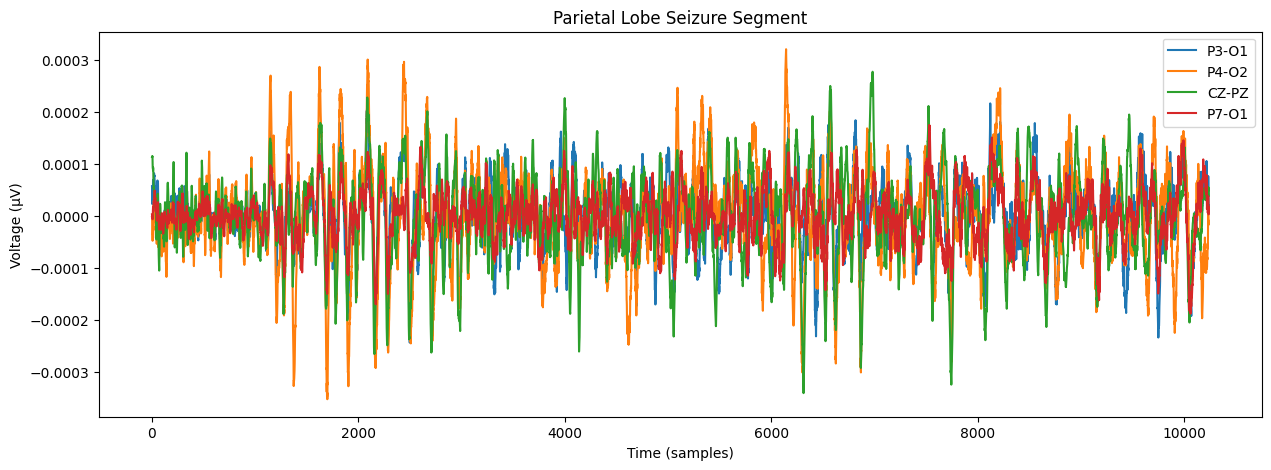

In [16]:
import matplotlib.pyplot as plt

df[['P3-O1', 'P4-O2', 'CZ-PZ', 'P7-O1']].plot(figsize=(15, 5), title='Parietal Lobe Seizure Segment')
plt.xlabel("Time (samples)")
plt.ylabel("Voltage (µV)")
plt.show()

**Based on the visualizations we can derive the following insights for Parietal Lobe**
* Activity is more moderate in amplitude, with consistent waveform patterns across channels like P3-O1 and CZ-PZ.
* Suggests this region is likely a propagation path, not the origin of the seizure.
* May correlate with temporary sensory issues like numbness or visual distortions, depending on propagation intensity.

**Midline & Deep Region Visualization**

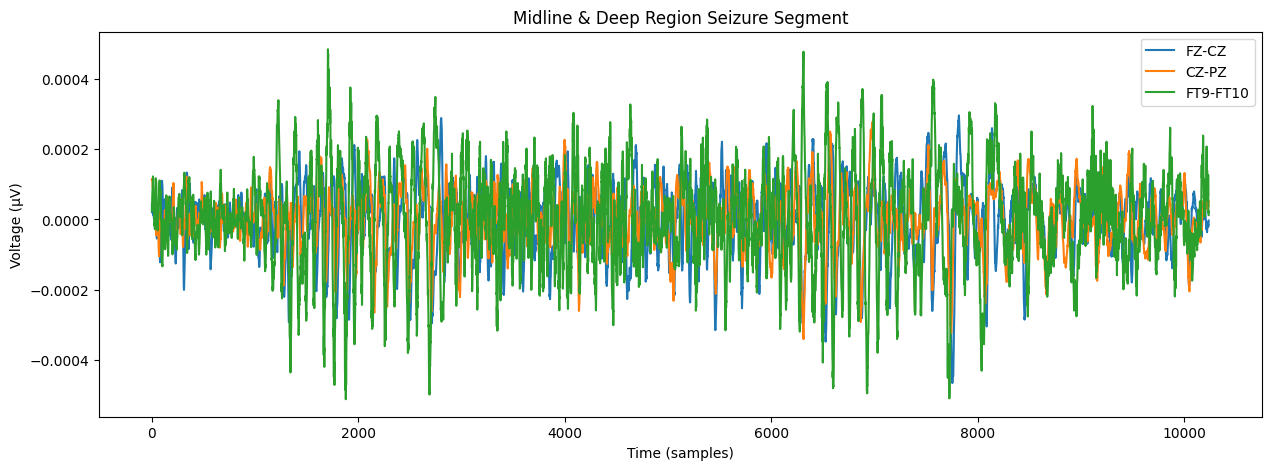

In [17]:
import matplotlib.pyplot as plt

df[['FZ-CZ','CZ-PZ','FT9-FT10']].plot(figsize=(15, 5), title='Midline & Deep Region Seizure Segment')
plt.xlabel("Time (samples)")
plt.ylabel("Voltage (µV)")
plt.show()


**Based on the visualizations we can derive the following insights for Occipital Lobe**
* Signal strength is relatively lower and more uniform, with subtle rhythmic activity in CZ-PZ and FT9-FT10.
* May represent diffuse spread of seizure rather than focal initiation, acting as a reference/baseline for comparison.
* Useful for identifying background vs seizure signal contrast, especially in central motor and coordination zones.

**Week 2: Phase 1 : Loading Datasets and Preprocessing**


## EEG Window Segmentation for Seizure Data

In the following step we are going to:
- **1**: Normalize each EEG channel → so all values are scaled between 0 and 1
- **2**: Cut the signal into fixed-length windows such that:
    - Each window is 2 seconds long → 512 samples at 256 Hz
    - We extract 20 such windows
- **3**: Label all of them as 1 → because this entire file represents a seizure period

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Step 1: Load the seizure EEG data
df = pd.read_csv("seizure_segment_chb01_03.csv")  # Make sure path is correct

# Step 2: Normalize each EEG channel
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df.values)

# Step 3: Set window parameters
sampling_rate = 256  # Hz
window_duration = 2  # seconds
window_size = sampling_rate * window_duration  # 512 samples per window
step_size = window_size  # no overlap

# Step 4: Segment data into fixed-length windows
X = []
y = []
for start in range(0, len(normalized_data) - window_size + 1, step_size):
    end = start + window_size
    window = normalized_data[start:end, :]  # Shape: (512, 23)
    X.append(window)
    y.append(1)  # Label 1 for seizure

# Step 5: Convert to numpy arrays
X = np.array(X)  # Shape: (num_windows, 512, 23)
y = np.array(y)  # Shape: (num_windows,)

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (20, 512, 23)
Shape of y: (20,)


## Preprocessing the non-seizure .edf file

Extracting EDF parameters from c:\Users\prani\OneDrive\Desktop\IEEE EMBS Internship\notebooks\data\chb01_01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\prani\AppData\Local\Temp\ipykernel_14576\1981112844.py:4: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  new_raw = mne.io.read_raw_edf('data/chb01_01.edf', preload=True)


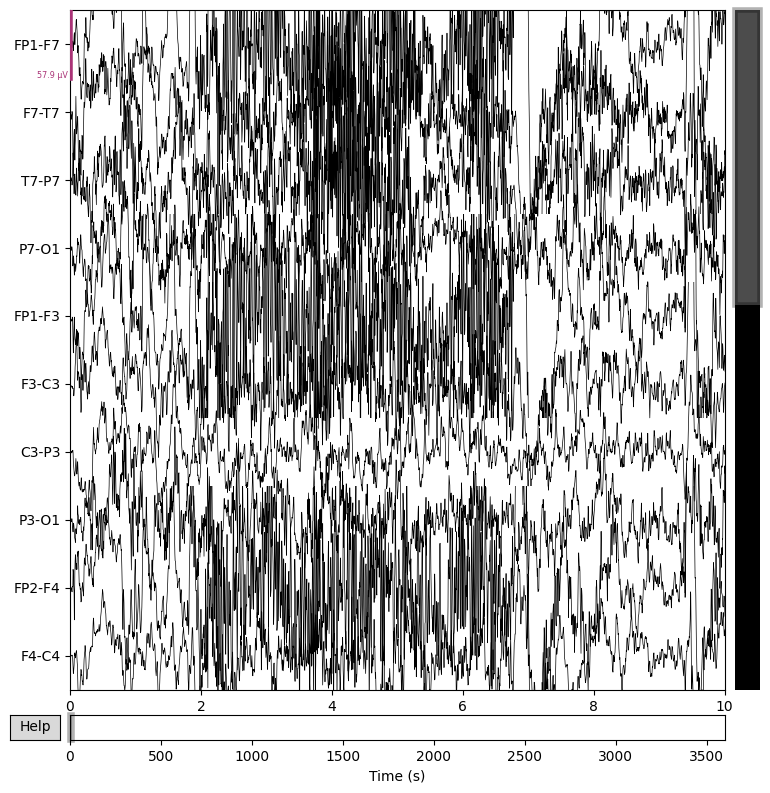

In [6]:
import mne

# Load the EDF file
new_raw = mne.io.read_raw_edf('data/chb01_01.edf', preload=True)

# Plot EEG signals
new_raw.plot(n_channels=10, scalings='auto', title='EEG Raw Data', show=False)

***Saving it in a CSV file***

In [8]:
import pandas as pd

# Convert EEG data to NumPy array
data, times = seizure_segment[:]

# Convert to DataFrame
df = pd.DataFrame(data.T, columns=raw.ch_names)

# Save to CSV
df.to_csv('seizure_segment_chb01_01.csv', index=False)

In the following step we are going to:
- **1**: Normalize each EEG channel → so all values are scaled between 0 and 1
- **2**: Cut the signal into fixed-length windows such that:
    - Each window is 2 seconds long → 512 samples at 256 Hz
    - We extract 20 such windows
- **3**: Label all of them as 0 → because this entire file represents a non-seizure period

In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Step 1: Load the seizure EEG data
df = pd.read_csv("seizure_segment_chb01_01.csv")  # Make sure path is correct

# Step 2: Normalize each EEG channel
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df.values)

# Step 3: Set window parameters
sampling_rate = 256  # Hz
window_duration = 2  # seconds
window_size = sampling_rate * window_duration  # 512 samples per window
step_size = window_size  # no overlap

# Step 4: Segment data into fixed-length windows
X_non = []
y_non = []
for start in range(0, len(normalized_data) - window_size + 1, step_size):
    end = start + window_size
    window = normalized_data[start:end, :]  # Shape: (512, 23)
    X_non.append(window)
    y_non.append(1)  # Label 1 for seizure

# Step 5: Convert to numpy arrays
X_non = np.array(X_non)  # Shape: (num_windows, 512, 23)
y_non = np.array(y_non)  # Shape: (num_windows,)

print("Shape of X:", X_non.shape)
print("Shape of y:", y_non.shape)

df.head()

Shape of X: (20, 512, 23)
Shape of y: (20,)


,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,...,F8-T8,T8-P8-0,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1
0,0.000057,0.000046,0.000056,3.321123e-06,-0.000022,0.000042,0.000085,0.000058,0.000010,0.000029,...,0.000046,0.000033,-0.000057,0.000043,0.000114,-0.000055,0.000019,0.000025,0.000006,0.000033
1,0.000053,0.000051,0.000056,2.539683e-06,-0.000020,0.000046,0.000089,0.000050,0.000026,0.000025,...,0.000039,0.000021,-0.000051,0.000036,0.000115,-0.000056,0.000016,0.000037,0.000009,0.000021
2,0.000046,0.000059,0.000055,-9.768010e-07,-0.000023,0.000050,0.000089,0.000043,0.000039,0.000018,...,0.000046,0.000011,-0.000070,0.000026,0.000114,-0.000055,0.000004,0.000055,0.000013,0.000011
3,0.000042,0.000064,0.000052,-4.102564e-06,-0.000022,0.000055,0.000083,0.000040,0.000046,0.000016,...,0.000051,0.000004,-0.000082,0.000020,0.000114,-0.000052,-0.000006,0.000069,0.000016,0.000004
4,0.000046,0.000058,0.000047,-2.539683e-06,-0.000016,0.000053,0.000080,0.000031,0.000051,0.000018,...,0.000041,-0.000006,-0.000077,0.000022,0.000115,-0.000046,0.000003,0.000074,0.000013,-0.000006


**Now we combine and shuffle seizure and non-seizure csv dataset in order to create training and testing dataset which can be used for model building from now.**

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

# X_seizure, y_seizure from earlier
# X_non_seizure, y_non_seizure from our new CSV

# Combine both
X_combined = np.concatenate((X, X_non), axis=0)
y_combined = np.concatenate((y, y_non), axis=0)

# Shuffle the data to mix seizure and non-seizure samples
X_combined, y_combined = shuffle(X_combined, y_combined, random_state=42)

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X_combined, y_combined, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (32, 512, 23)
Test set shape: (8, 512, 23)


### ***Finally we will save these models as training and testing and use these .csv files for training all classical models like Random Forest and SVM***

In [13]:
import pandas as pd

# Flatten each sample: (512, 23) → (11776,)
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Convert to DataFrames
df_X_train = pd.DataFrame(X_train_flat)
df_y_train = pd.DataFrame(y_train, columns=["label"])

df_X_test = pd.DataFrame(X_test_flat)
df_y_test = pd.DataFrame(y_test, columns=["label"])

# Save to CSV
df_X_train.to_csv("eeg_train_X.csv", index=False)
df_y_train.to_csv("eeg_train_y.csv", index=False)

df_X_test.to_csv("eeg_test_X.csv", index=False)
df_y_test.to_csv("eeg_test_y.csv", index=False)

print("Train and Test sets saved as CSVs.")


Train and Test sets saved as CSVs.
